# PHYS3112 Computational Assignment 2: Two Slit Interference
## Shamit Mani z5157509

## Part 1: Calculating Wavelength of Laser Light Source 

The intensity of the interference pattern along the screen was measured using a voltmeter and hence the units for intensity are in volts. All the intensity data taken during the lab experiment is stored in the list named 'Voltage'. The detector slit used in the experiment operated in a range between 1-7 mm. The points for the position along the screen is stored in the list 'Position'.

We start off by importing the necessary libraries. 

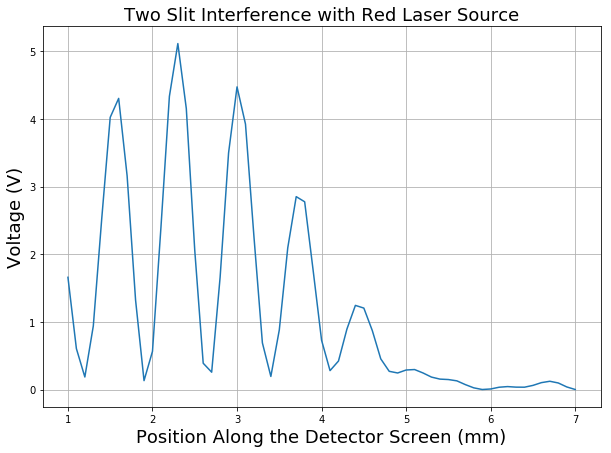

In [162]:
import numpy as np
import matplotlib.pyplot as plt
import math

#Voltage data, collected during lab
Voltage = [1.6585, 0.6045, 0.1854, 0.9395, 2.5285, 4.0225, 4.3025, 3.1575, 1.3215, 0.1315, 0.5645, 2.3955, 4.3325, 5.1125, 4.1525, 2.0575, 0.3885, 0.2565, 1.6595, 3.4965, 4.4725, 3.9225, 2.2615, 0.6895, 0.1936, 0.8815, 2.0935, 2.8505, 2.7745, 1.7635, 0.7285, 0.2795, 0.4215, 0.8945, 1.2435, 1.2035, 0.8715, 0.4535, 0.2693, 0.2447, 0.2886, 0.2955, 0.2448, 0.1839, 0.1541, 0.1477, 0.1284, 0.0731, 0.0251, 0.0005, 0.0082, 0.0341, 0.0436, 0.0355, 0.0346, 0.0611, 0.1019, 0.1222, 0.0969, 0.0385, 0.0005]

#detector slit position taken from 1 mm to 7 mm in 0.1 mm increments
Position = np.linspace(1.0, 7.0, len(Voltage))


plt.rcParams['figure.figsize'] = [10, 7] #resizing the plot

plt.plot(Position,Voltage)
plt.xlabel('Position Along the Detector Screen (mm)', fontsize=18)
plt.ylabel('Voltage (V)', fontsize=18)
plt.title('Two Slit Interference with Red Laser Source', fontsize=18)
plt.grid()
plt.show()



## Position of Each Maxima
Using the graph, we can figure out the positions along the detector screen of each maxima:

| Maxima Order | Maxima Position (mm)|
|--------------|---------------------|
| Oth (Central)|         2.3        |
| 1st (Left)|          1.6        |
| 1st (Right)|         3.0        |
| 2nd (Right)|         3.7        |
| 3rd (Right)|         4.4       |

 The relationship between the distance of each maxima from the central maxima and the wavelength of the light source is given by 
$$\lambda = \frac{\Delta y_{m}d}{mL}$$

where:

$\lambda$ is the wavelength of the light source .

$\Delta y_{m}$ is the distance from central maxima to the mth order maxima.

$d$ is the slit separation.

$L$ is the distance from the slits to the screen.

$m$ is the order of the maxima.

The lab settings were d = 0.457 mm and L = 495 mm.
The wavelength can be calculated for using each maxima and the average can then be taken.

In [163]:
light_wavelength = (1e6)*(0.457/495)*((2.3-1.6)/1 + (3-2.3)/1 + (3.7-2.3)/2 + (4.4-2.3)/3)/4

print('The average wavelength is ' + str(light_wavelength) + ' nm')

The average wavelength is 646.2626262626263 nm


The average wavelength found the data was found to be 646.3 nm, visible light in the red spectrum. 

## Part 2: Simulating Interference Patterns

The variation of the intensity of the interference pattern along the length of the detector screen can be expressed with the equation:

$$I \propto cos^{2}\frac{\pi dy}{\lambda L} \qquad [1]$$

[1] Jenkins FA and White HE, Fundamentals of Optics, 1967

$I$ is the relative intensity.

$d$ is the slit separation.

$y$ is the position along the detector screen.

$\lambda$ is the wavelength of the light source.

$L$ is the distance from the slits to the detector screen.

We can let $\alpha = \frac{\pi dy}{\lambda L}$ to simplify our equation.

In practice, the interference pattern will have an additional envelope that scales the periodic interference pattern . The envelope of the interference pattern is the single slit diffraction pattern, the shape that would be created if the two slit set up were replaced with a single slit. We will assume that the width of each individual slit is small enough to neglect the envelope. 

### a) 5Ghz wifi signal, with a slit separation of 5m and a distance to the screen of 200m.

The wavelength of a 5Ghz signal is 

$$\lambda = \frac{c}{\nu} = \frac{2.99\cdot10^{8}m/s}{5\cdot10^{9}Hz}$$

$$= 0.06 metres$$

<function matplotlib.pyplot.show(*args, **kw)>

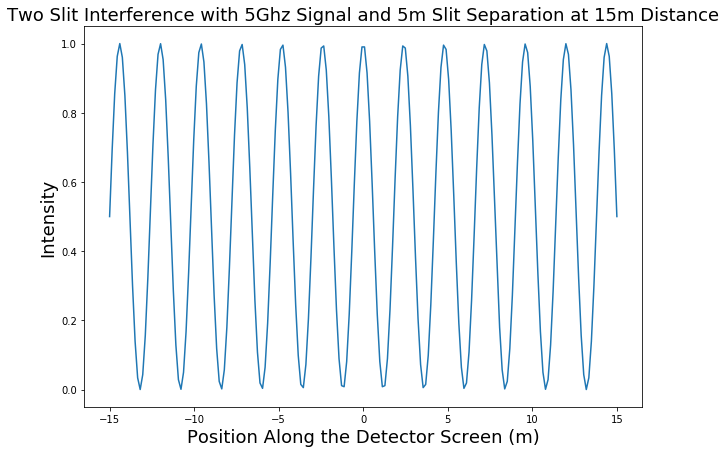

In [164]:
Pi = math.pi #Storing the value of pi in this variable. We will be using pi often in our code. 

y_wifi = np.linspace(-15,15,200) #a series of points form -15 m to 15 m along the detector screen

wavelength = 0.06 #in metres
d = 5 #slit separation in metres
L = 200 #distance from slit to screen in metres

alpha = (Pi*d*y_wifi)/(wavelength*L)

I_wifi = (np.cos(alpha))**2 #intensity of wifi signal across detector screen 

plt.plot(y_wifi,I_wifi)
plt.xlabel('Position Along the Detector Screen (m)', fontsize=18)
plt.ylabel('Intensity', fontsize=18)
plt.title('Two Slit Interference with 5Ghz Signal and 5m Slit Separation at 15m Distance', fontsize=18)
plt.show


### b) Electrons moving at $10^{-4}$c, with a slit separation of 1 micron and a distance to the screen of 15m

Electrons are typically viewed as  particles, but with the development of quantum mechanics and experiments such as the electron double slit experiment, we know they also exhibit wave-like behaviour. We can treat the electron as a wave and find it's de Broglie wavelength once we know it's momentum.

$$\lambda = \frac{h}{p} = \frac{h}{mv}$$

$\lambda$ is the de Broglie wavelength of the electron, $h$ is Planck's constant, $m$ is the mass of an electron, $9.109\cdot 10^{-31}$ kilograms, and v is the speed of the electron, $10^{-4}c$, where c is the speed of light, $2.99\cdot 10^{8}$ metres/second.

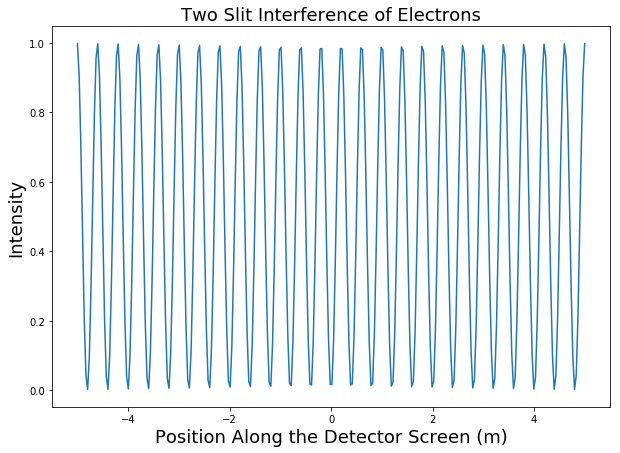

In [165]:
y_electron = np.linspace(-5,5,300) #a series of points form -5 m to 5 m along the detector screen

electron_mass = 9.109e-31 #mass of electron in kilograms
electron_speed = (2.99e8)*(10e-4) #speed of electron in metres/second
h = 6.626e-34 #Planck's Constant

electron_wavelength = h/(electron_mass*electron_speed) #de Broglie wavelength of the electron

electron_slit = 1e-6 #slit separation in metres
L_electron = 15 #distance from slits to detector screen in metres

alpha_e = (Pi*electron_slit*y_electron)/(electron_wavelength*L_electron)

I_e = (np.cos(alpha_e))**2 

plt.plot(y_electron,I_e)
plt.xlabel('Position Along the Detector Screen (m)', fontsize=18)
plt.ylabel('Intensity', fontsize=18)
plt.title('Two Slit Interference of Electrons', fontsize=18)
plt.show()